In [2]:
!pip install kagglehub


   ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
   ------------------------ --------------- 41.0/68.0 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 68.0/68.0 kB 1.2 MB/s eta 0:00:00


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpiosenka/moths-image-datasetclassification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Rebecca\.cache\kagglehub\datasets\gpiosenka\moths-image-datasetclassification\versions\1


In [1]:
from pathlib import Path
import os

# Set the dataset path
dataset_path = Path(r"C:\Users\Rebecca\.cache\kagglehub\datasets\gpiosenka\moths-image-datasetclassification\versions\1")

# List all the folders (each should be a class/species)
class_folders = sorted([f.name for f in dataset_path.iterdir() if f.is_dir()])
print(f"Found {len(class_folders)} species/classes:")
print(class_folders[:10])  # Show the first 10 species


Found 3 species/classes:
['test', 'train', 'valid']


In [2]:
for class_name in class_folders[:5]:  # Just check the first 5 for now
    image_folder = dataset_path / class_name
    num_images = len(list(image_folder.glob("*")))
    print(f"{class_name}: {num_images} images")


test: 50 images
train: 50 images
valid: 50 images


In [4]:
# Navigate inside the 'train' folder
train_path = dataset_path / "train"

# List the species inside 'train'
species_folders = sorted([f.name for f in train_path.iterdir() if f.is_dir()])
print(f"Found {len(species_folders)} species in training set:")
print(species_folders[:10])  # Show the first 10



Found 50 species in training set:
['ARCIGERA FLOWER MOTH', 'ATLAS MOTH', 'BANDED TIGER MOTH', 'BIRD CHERRY ERMINE MOTH', 'BLACK RUSTIC MOTH', 'BLAIRS MOCHA', 'BLOTCHED EMERALD MOTH', 'BLUE BORDERED CARPET MOTH', 'CINNABAR MOTH', 'CLEARWING MOTH']


In [6]:
for species in species_folders:
    image_folder = train_path / species
    num_images = len(list(image_folder.glob("*")))
    print(f"{species}: {num_images} images")


ARCIGERA FLOWER MOTH: 140 images
ATLAS MOTH: 129 images
BANDED TIGER MOTH: 136 images
BIRD CHERRY ERMINE MOTH: 133 images
BLACK RUSTIC MOTH: 134 images
BLAIRS MOCHA: 177 images
BLOTCHED EMERALD MOTH: 117 images
BLUE BORDERED CARPET MOTH: 121 images
CINNABAR MOTH: 131 images
CLEARWING MOTH: 122 images
COMET MOTH: 105 images
DEATHS HEAD HAWK MOTH: 169 images
ELEPHANT HAWK MOTH: 160 images
EMPEROR GUM MOTH: 136 images
EMPEROR MOTH: 142 images
EYED HAWK MOTH: 165 images
FIERY CLEARWING MOTH: 139 images
GARDEN TIGER MOTH: 131 images
HERCULES MOTH: 137 images
HORNET MOTH: 120 images
HUMMING BIRD HAWK MOTH: 143 images
IO MOTH: 120 images
JULY BELLE MOTH: 186 images
KENTISH GLORY MOTH: 175 images
LACE BORDER MOTH: 175 images
LEOPARD MOTH: 167 images
LUNA MOTH: 117 images
MADAGASCAN SUNSET MOTH: 123 images
MAGPIE MOTH: 170 images
MUSLIN MOTH: 168 images
OLEANDER HAWK MOTH: 132 images
OWL MOTH: 121 images
PALPITA VITREALIS MOTH: 174 images
PEACH BLOSSOM MOTH: 149 images
PLUME MOTH: 170 images
PO

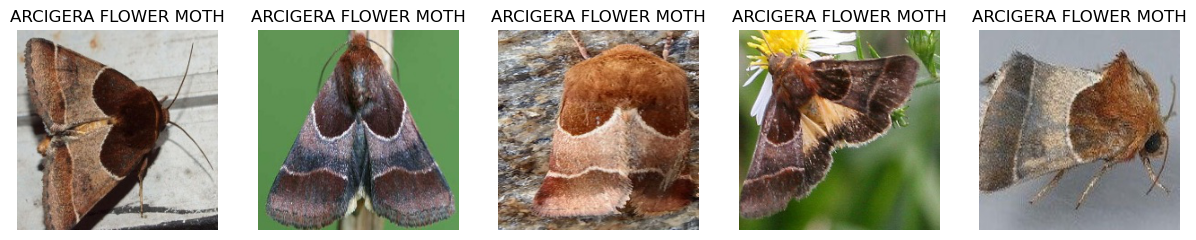

In [7]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Pick a random species and load 5 sample images
sample_species = random.choice(species_folders)
sample_images = list((train_path / sample_species).glob("*"))[:5]

# Plot the images
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    with open(img_path, 'rb') as f:  # This avoids permission issues
        img = Image.open(f)
        img = img.convert('RGB')  # In case of .png with alpha channel
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(sample_species)
        plt.axis("off")
plt.show()


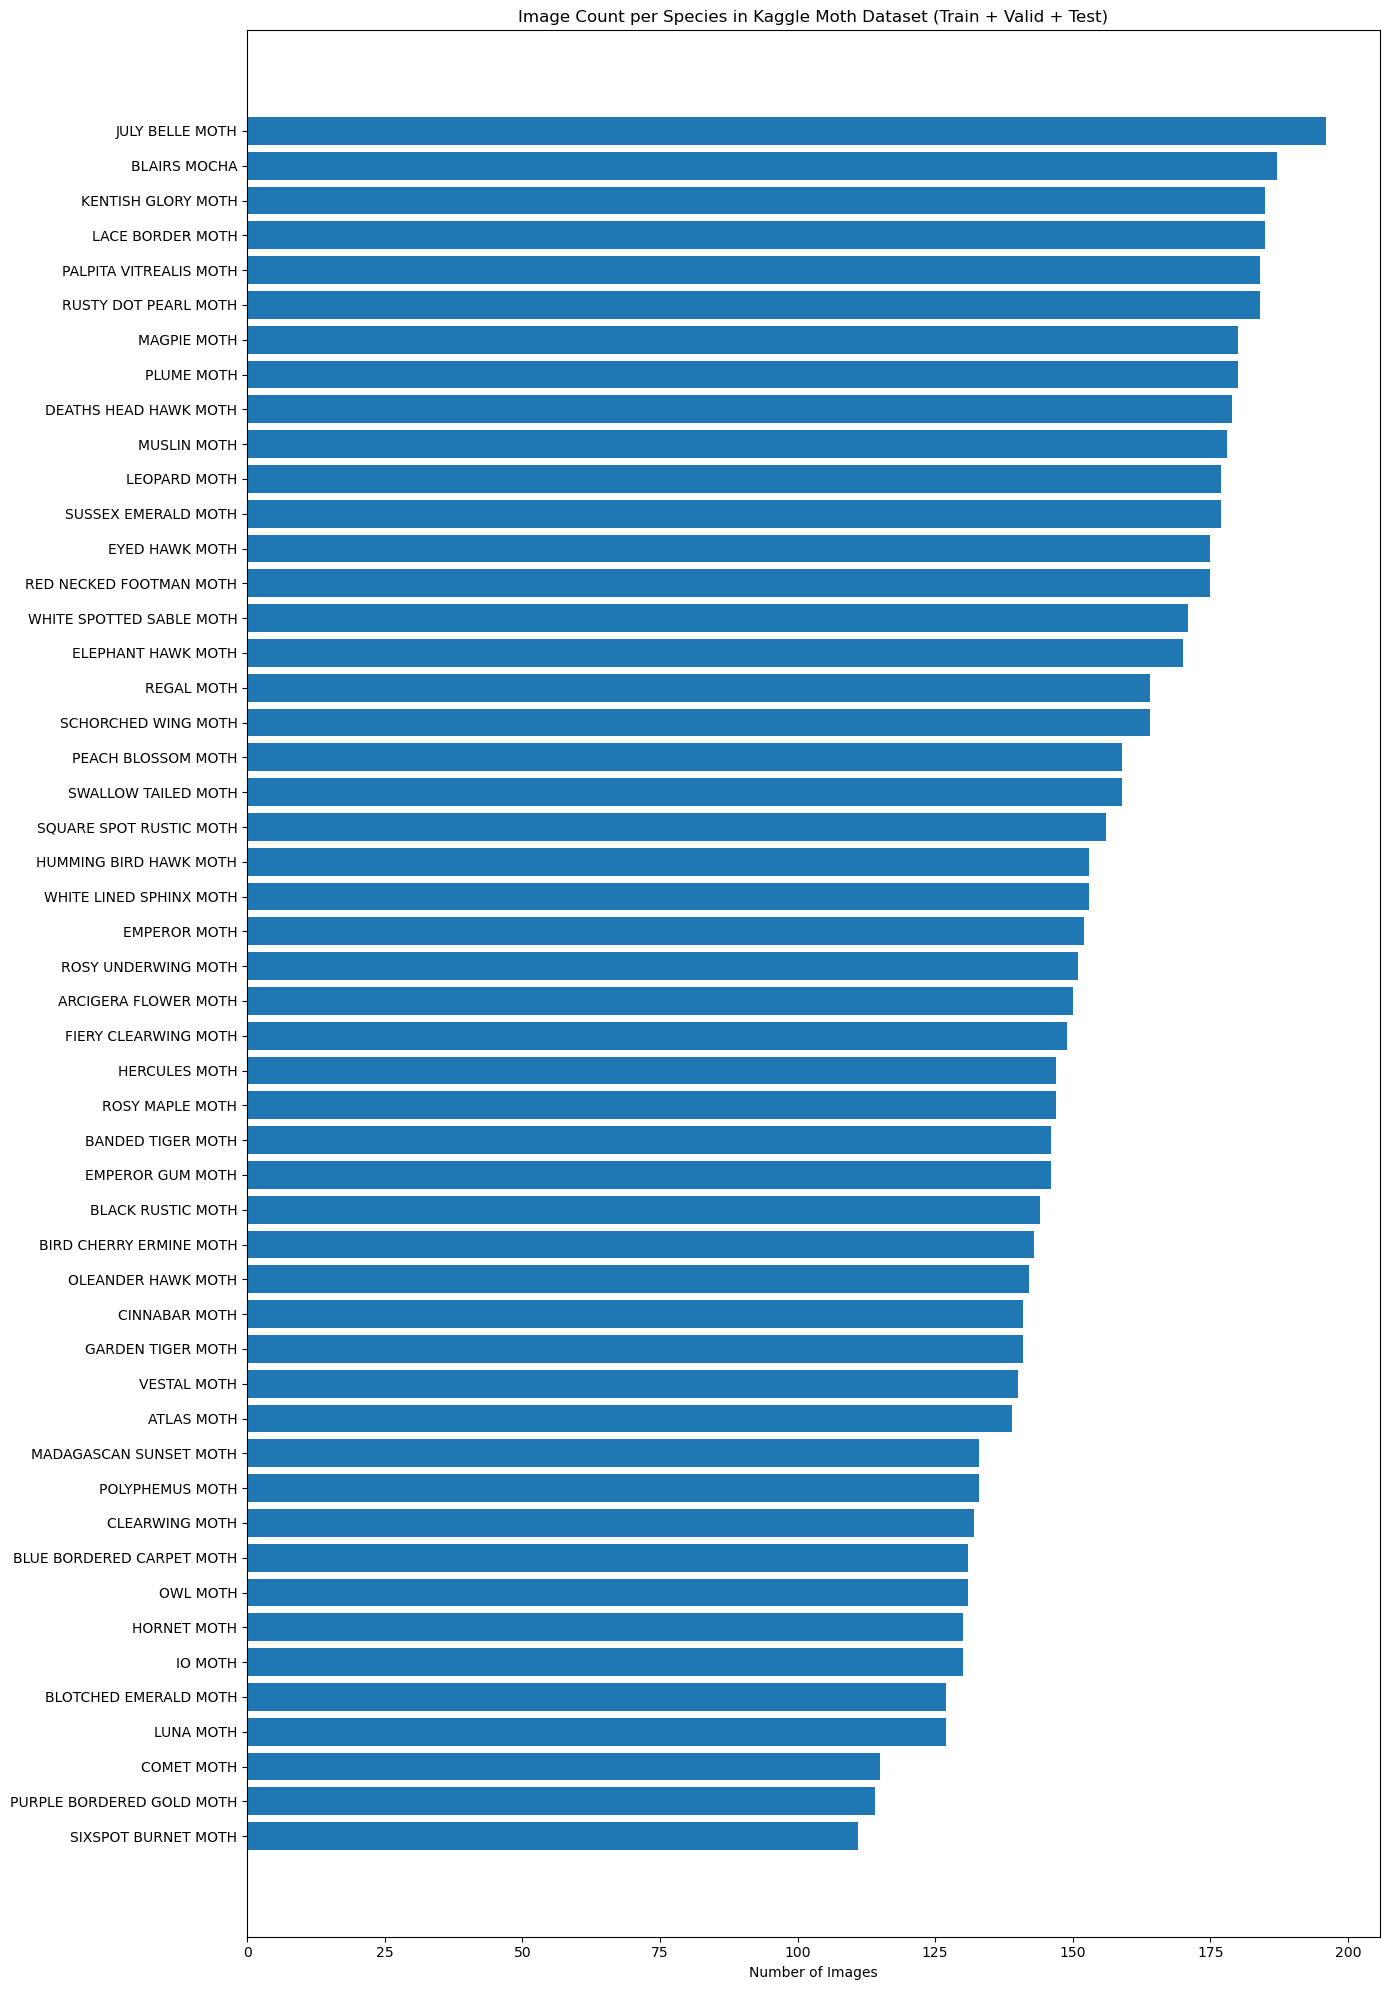

In [ ]:
from collections import defaultdict

# Set your dataset base path (update this if needed)
base_path = Path(r"C:\Users\Rebecca\.cache\kagglehub\datasets\gpiosenka\moths-image-datasetclassification\versions\1")

# Folders to scan
folders = ['train', 'valid', 'test']

# Count images per species
species_counts = defaultdict(int)

for folder in folders:
    folder_path = base_path / folder
    if not folder_path.exists():
        continue
    for species_dir in folder_path.iterdir():
        if species_dir.is_dir():
            num_images = len(list(species_dir.glob('*.*')))  # All image files
            species_counts[species_dir.name] += num_images

# Sort species by image count
sorted_counts = dict(sorted(species_counts.items(), key=lambda item: item[1], reverse=True))

# Plot
plt.figure(figsize=(14, 20))
plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()))
plt.xlabel("Number of Images")
plt.title("Image Count per Species in Kaggle Moth Dataset (Train + Valid + Test)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
